In [415]:
# Importations de modules
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from random import seed, randint
from enum import Enum
%matplotlib inline

#import play

In [416]:
# définit une classe stratégie
class Strategie(Enum):
    idem = 1 # ne pas changer de choix
    alter = 2 # changer de choix
    alea = 3 # adopter aléatoirement une des deux stratégies ci-dessus

In [417]:
def play(strat, nbe):
    # Génération des tirages alétaoires
    tir = np.random.randint(1,4, size=nbe) # tirage (numéro du gobelet gagnant)
    chx = np.random.randint(1,4, size=nbe) # choix du joueur
    # Prise en compte de la stratégie "aléatoire" 
    if strat == Strategie.alea: # si le joueur choisit aléatoirement sa stratégie
        tab_strat = np.random.randint(0,2, size=nbe) # tableau de stratégies (0:idem ou 1:alter)
        return np.multiply(tab_strat != np.array([chx == tir]),1).reshape(nbe,) # *voir note plus bas
    else:
    # Calcul du résultat selon la stratégie "garder" ou "changer"
        if strat == Strategie.idem: # si le joueur garde son choix de départ
            return np.multiply(np.array([chx == tir]),1).reshape(nbe,) # compare les éléments des tablaux chx et tir un à un
        elif strat == Strategie.alter: # si le joueur change de choix 
            return np.multiply(~np.array([chx == tir]),1).reshape(nbe,) # inverse du résultat précédent
# s'il avait choisi le gagnant...il choisit désormais forcément un perdant
# s'il avait choisi le perdant... le maître du jeu retire l'autre perdant et il reste le gagnant
        else: 
            print("Erreur de stratégie !")
# * Note : en faisant un schéma logique, on s'aperçoit que dans le cas d'un choix aléatoire de la stratégie,
# On gagne si et seulement si :
# 1) on est en stratégie "garder" et on avait gagné (config strat = 0 et resultat = 0)
# 2) on est en stratégie "changer" et on avait perdu (config strat = 1 et resultat = 1)
# ce qui correspond en logique à l'opérateur XOR, traduit ici en utilisant "!=" (différent de)
# sur les éléments des deux tableaux un à un.

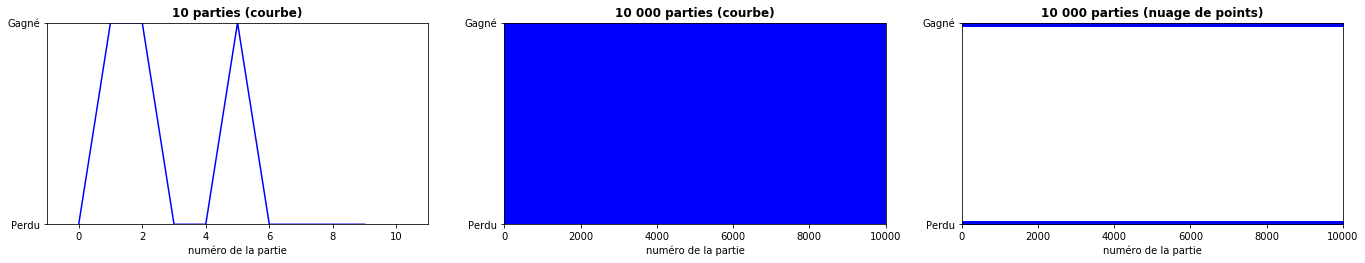

In [418]:
########################
# Partie visualisation #
########################

#figure = plt.figure()
#plt.figure(fig1)

# graphe pour 10 parties
plot1 = plt.subplot(1, 3, 1)
plt.title("10 parties (courbe)",fontweight="bold")
plt.xlabel("numéro de la partie")
plot1.yaxis.set_major_locator(plt.MaxNLocator(1))
plot1.axis([-1, 11, 0, 1])
plot1.yaxis.set_ticklabels(["Perdu","Gagné"])
plot1.plot(np.arange(10),play(Strategie.idem, 10), color = 'blue')

# graphe pour 10000 parties (courbe)
plot2 = plt.subplot(1, 3, 2)
plt.title("10 000 parties (courbe)",fontweight="bold")
plt.xlabel("numéro de la partie")
plot2.yaxis.set_major_locator(plt.MaxNLocator(1))
plot2.axis([-1, 10001, 0, 1])
plot2.yaxis.set_ticklabels(["Perdu","Gagné"])
plot2.plot(np.arange(10000),play(Strategie.idem, 10000), color = 'blue')

# graphe pour 10000 parties (nuage de point)
plot3 = plt.subplot(1, 3, 3)
plt.title("10 000 parties (nuage de points)",fontweight="bold")
plt.xlabel("numéro de la partie")
plot3.yaxis.set_major_locator(plt.MaxNLocator(1))
plot3.axis([-1, 10001, 0, 1])
plot3.yaxis.set_ticklabels(["Perdu","Gagné"])
plot3.scatter(np.arange(10000),play(Strategie.idem, 10000), color = 'blue')

# gestion des marges
plt.gcf().subplots_adjust(left = 0, bottom = 0.2, right = 3, top = 0.9, wspace = 0.2, hspace = 0.2)

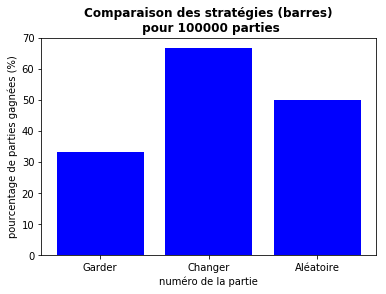

In [419]:
### trace le graphe en barres qui compare le pourcentage de gain moyen
### des 3 stratégies pour un nbe d'essais choisis

nbe = 100000
plt.title("Comparaison des stratégies (barres)\n pour " + str(nbe) + " parties",fontweight="bold")
plt.xlabel("numéro de la partie")
plt.ylabel("pourcentage de parties gagnées (%)")
plot = plt.bar([1,2,3],[np.mean(play(Strategie.idem, nbe))*100,\
                        np.mean(play(Strategie.alter, nbe))*100,\
                       np.mean(play(Strategie.alea, nbe))*100],\
               tick_label=["Garder", "Changer", "Aléatoire"], color = 'blue')

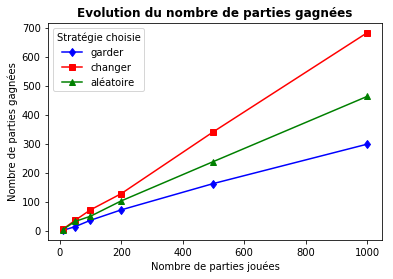

In [420]:
### trace le graphe des nbe de victoires en fonction du nombre d'essais pour les 3 stratégies

ech=[10,50,100,200,500,1000] # tableau de différents nombres de parties

p1 = plt.plot(ech, [somme(Strategie.idem, i)for i in ech], 'bd-')
p2 = plt.plot(ech, [somme(Strategie.alter, i)for i in ech], 'r-s')
p3 = plt.plot(ech, [somme(Strategie.alea, i)for i in ech], 'g^-')
plt.title("Evolution du nombre de parties gagnées",fontweight="bold")
plt.xlabel("Nombre de parties jouées")
plt.ylabel("Nombre de parties gagnées")
plt.legend(['garder','changer', 'aléatoire'],title = 'Stratégie choisie')  
plt.show()